<a href="https://colab.research.google.com/github/ahmedfathi1/Project-2/blob/main/Project_2_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTw3ViyzRmoFqMklP0cJYLB45pzX0l_wBY_vB_KxE9c50o3QM9wI3qxMJPTD-qfmVeNKsXCw6HAYuj0/pub?output=csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# deleting the id column because it is unnecessary
df = df.drop('id', axis = 1)

In [5]:
# Check for duplicates and missing values
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Duplicates: 0


In [6]:
# filling the missing values in the bmi column with the mean
mean_bmi = df['bmi'].median()
df['bmi'].fillna(mean_bmi, inplace=True)

In [7]:
# checking for odd values in the remaining 'object' type columns
dtypes = df.dtypes
remaining_cols = dtypes[dtypes == 'object'].index
remaining_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [8]:
# using the for loop to loop through the object columns and print their values to see any inconsistent data
for col in remaining_cols:
  print(f'-- Column = {col}')
  print(df[col].value_counts(dropna = False))
  print('\n')

-- Column = gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


-- Column = ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


-- Column = work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


-- Column = Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


-- Column = smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [9]:
# looking at the descriptive statistics of the data
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


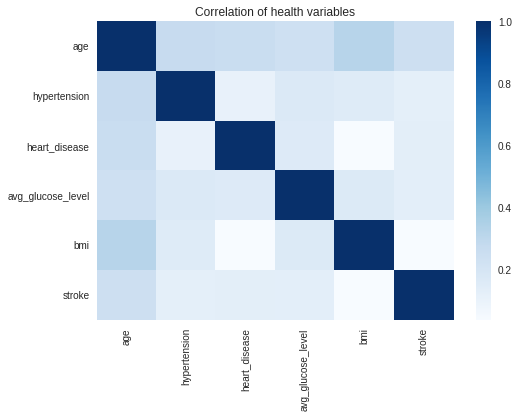

In [53]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues').set(title='Correlation of health variables');

#Some correlations of note here are the age to bmi and the bmi to avg_glucose_level. Both of these correlations make sense becuase age and Glucose levels play a huge part in someones BMI.

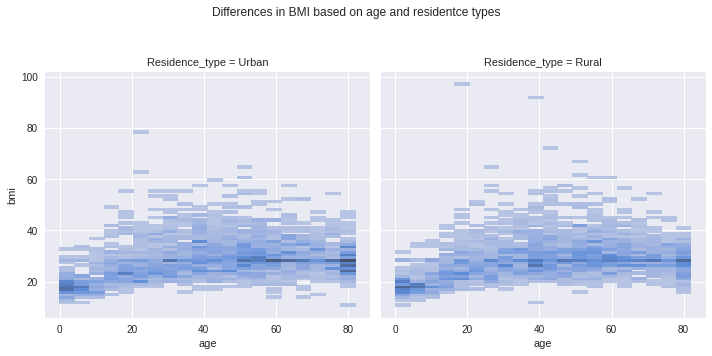

In [52]:
rel = sns.displot(df, x = "age", y = "bmi", col="Residence_type")
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Differences in BMI based on age and residentce types');

#Based on our data, we can see that those that live in urban areas and are between the ages of 20 and 60 are more likely to have higher BMIs than those that live in Rural areas. There are envrionmental factoras that may be affecting this, including wealth disparities, food access, and overall health between populations from the two residence types.